In [23]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
from pandas import Series
%matplotlib inline


In [24]:
train_df=pd.read_csv('./Train_SU63ISt.csv')
test_df=pd.read_csv('./Test_0qrQsBZ.csv')

In [25]:
# Copy of original data so that we dont loose original data during analysis
train_original=train_df.copy() 
test_original=test_df.copy()

## Explore Data

In [26]:
train_df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


In [28]:
train_df.describe()

,ID,Count
count,18288.000000,18288.000000
mean,9143.500000,138.958115
std,5279.435197,153.467461
min,0.000000,2.000000
25%,4571.750000,22.000000
50%,9143.500000,84.000000
75%,13715.250000,210.000000
max,18287.000000,1244.000000


In [29]:
test_df.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


In [31]:
test_df.describe()

,ID
count,5112.000000
mean,20843.500000
std,1475.851619
min,18288.000000
25%,19565.750000
50%,20843.500000
75%,22121.250000
max,23399.000000


## Feature Extraction

In [32]:
train_df['Datetime'] = pd.to_datetime(train_df.Datetime,format='%d-%m-%Y %H:%M')
test_df['Datetime'] = pd.to_datetime(test_df.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [33]:
for i in (train_df, test_df, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [34]:
train_df.head(10)

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4
5,5,2012-08-25 05:00:00,2,2012,8,25,5
6,6,2012-08-25 06:00:00,2,2012,8,25,6
7,7,2012-08-25 07:00:00,2,2012,8,25,7
8,8,2012-08-25 08:00:00,6,2012,8,25,8
9,9,2012-08-25 09:00:00,2,2012,8,25,9


In [13]:
# Hypothesis Traffic on weekday is more compared to weekend

In [35]:
train_df['day of week']=train_df['Datetime'].dt.dayofweek 


In [36]:
def is_weekend(x):
    if x == 5 or x == 6:
        return 1
    else:
        return 0 

In [37]:
train_df['weekend']=train_df['day of week'].apply(is_weekend)

In [38]:
train_df.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [39]:
train_df.set_index('Datetime',drop=True,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


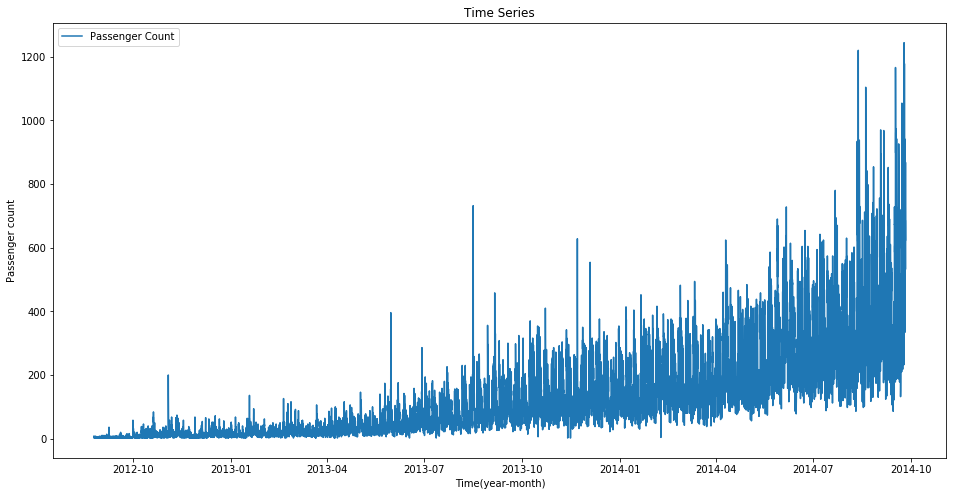

In [40]:
ts = train_df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

## EDA 

In [41]:
#Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.

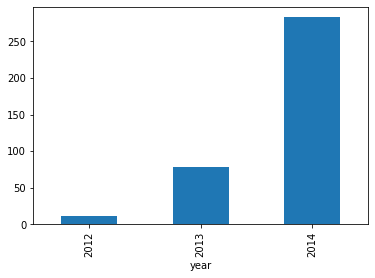

In [42]:
train_df.groupby('year')['Count'].mean().plot.bar()

In [43]:
# Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.

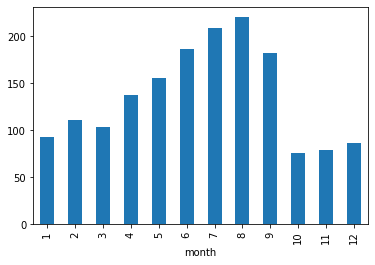

In [44]:
train_df.groupby('month')['Count'].mean().plot.bar()

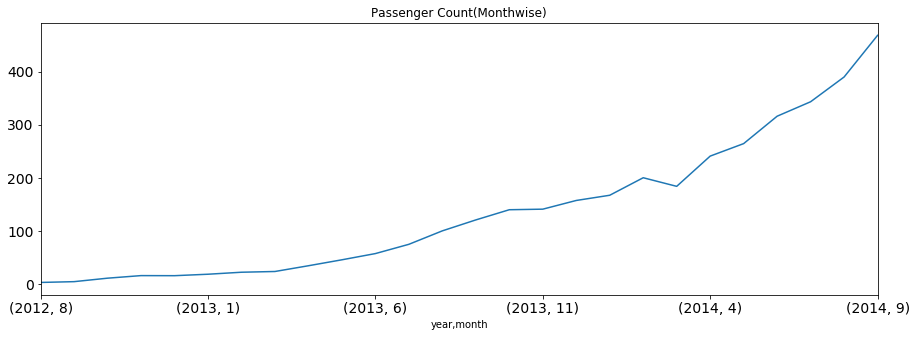

In [45]:
temp=train_df.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

In [47]:
# We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.
# Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.

# In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.

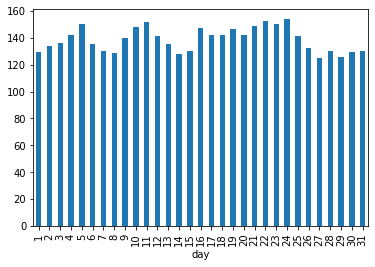

In [48]:
train_df.groupby('day')['Count'].mean().plot.bar()

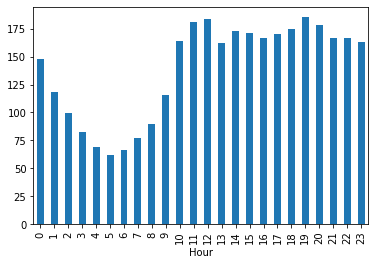

In [49]:
train_df.groupby('Hour')['Count'].mean().plot.bar()

In [50]:
# It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.
# After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

In [51]:
# Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

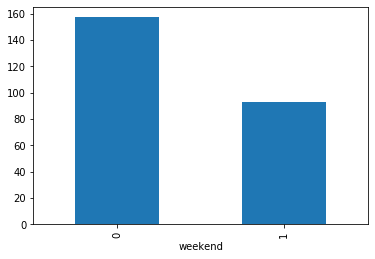

In [52]:
train_df.groupby('weekend')['Count'].mean().plot.bar()

In [53]:
# It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.

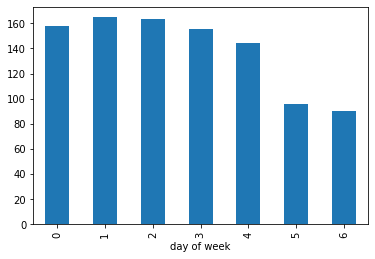

In [54]:
train_df.groupby('day of week')['Count'].mean().plot.bar()

In [55]:
# From the above bar plot, we can infer that the passenger count is less for saturday and sunday as compared to the other days of the week. 
# Now we will look at basic modeling techniques. Before that we will drop the ID variable as it has nothing to do with the passenger count.

In [56]:
# aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise

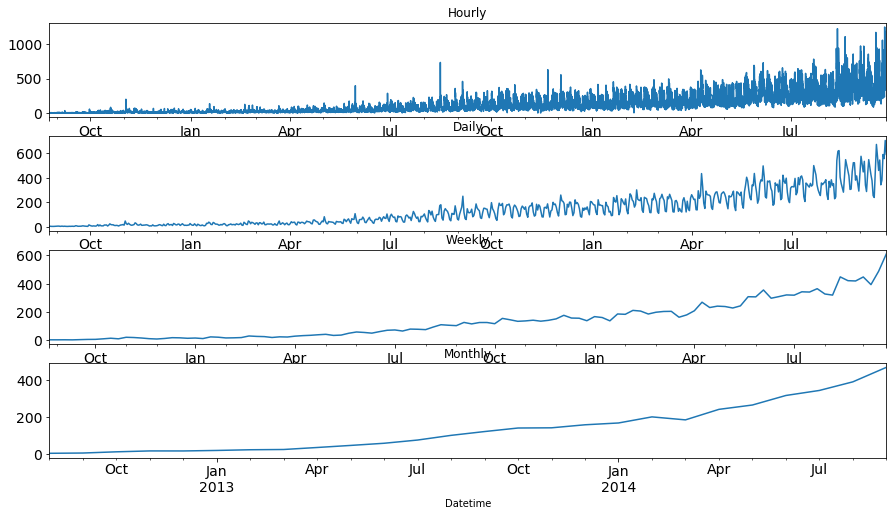

In [57]:

# Hourly time series 
hourly = train_df.resample('H').mean() 
# Converting to daily mean 
daily = train_df.resample('D').mean() 
# Converting to weekly mean 
weekly = train_df.resample('W').mean() 
# Converting to monthly mean 
monthly = train_df.resample('M').mean()
# Let’s look at the hourly, daily, weekly and monthly time series.

fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

plt.show()

In [61]:
test_df.head()

,ID,Datetime,year,month,day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [62]:
test_df.Timestamp = pd.to_datetime(test_df.Datetime,format='%d-%m-%Y %H:%M') 
test_df.index = test_df.Timestamp 
test_df = test_df.resample('D').mean() 

train_df.Timestamp = pd.to_datetime(train_df.index,format='%d-%m-%Y %H:%M') 
train_df.index = train_df.Timestamp 
# Converting to daily mean 
train_df = train_df.resample('D').mean()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [63]:
train_df.index.min()

Timestamp('2012-08-25 00:00:00')

In [64]:
train_df.index.max()

Timestamp('2014-09-25 00:00:00')

In [69]:
Train=train_df['2012-08-25':'2014-06-24'] 
Test_Valid=train_df['2014-06-25':'2014-09-25']


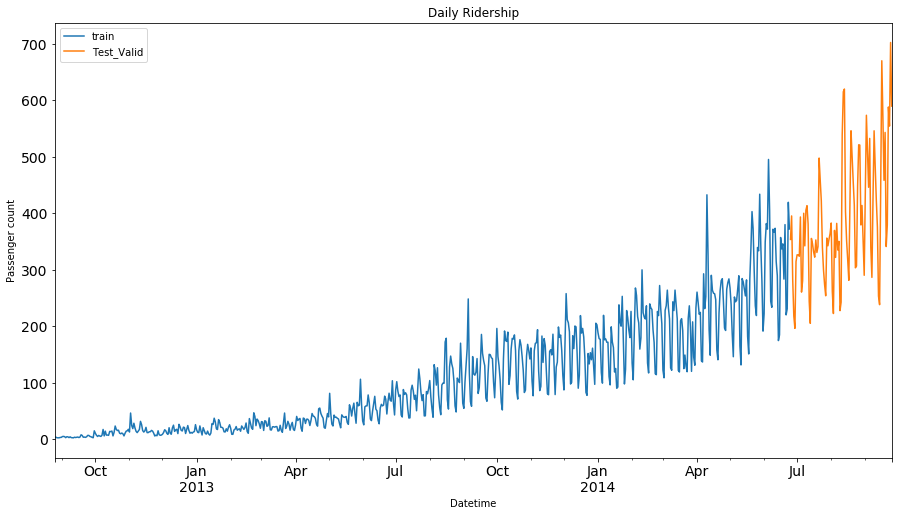

In [73]:
Train.Count.plot(figsize=(15,8),title='Daily Ridership', fontsize=14, label='train')
Test_Valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='Test_Valid')
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

# Naive Approach

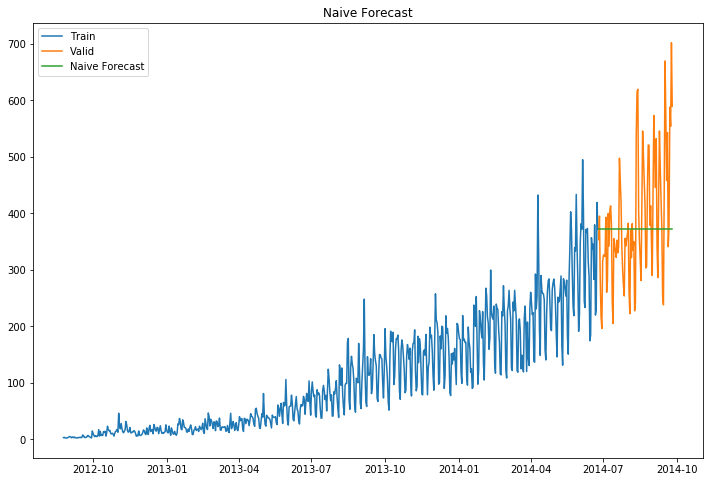

In [77]:
dd= np.asarray(Train.Count) 
y_hat = Test_Valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(Test_Valid.index,Test_Valid['Count'], label='Test_Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [78]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(Test_Valid.Count, y_hat.naive)) 
print(rms)

111.79050467496724


# Moving Average

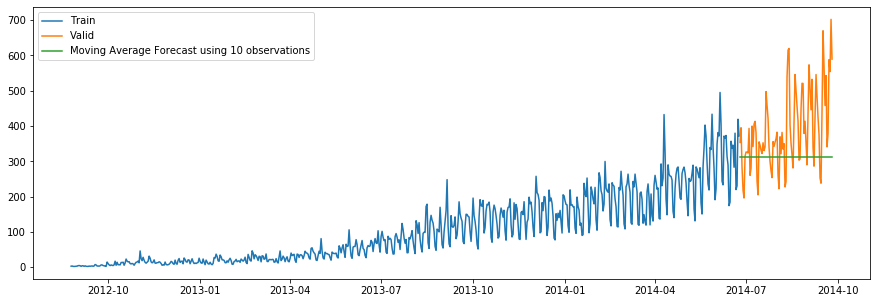

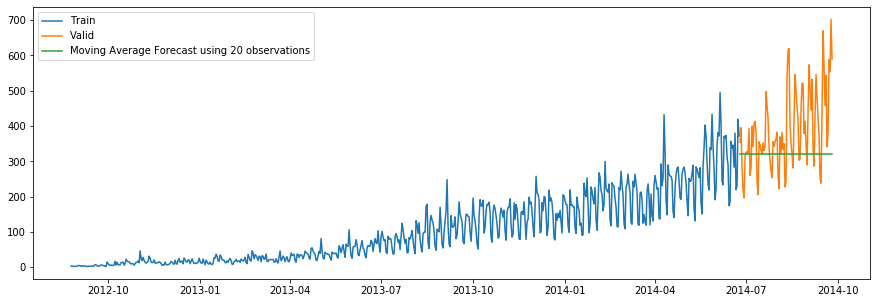

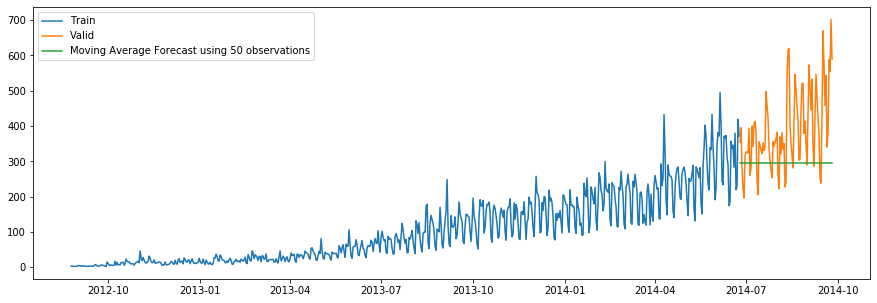

In [79]:
valid=Test_Valid.copy()
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

# Simple Exponential Smoothing

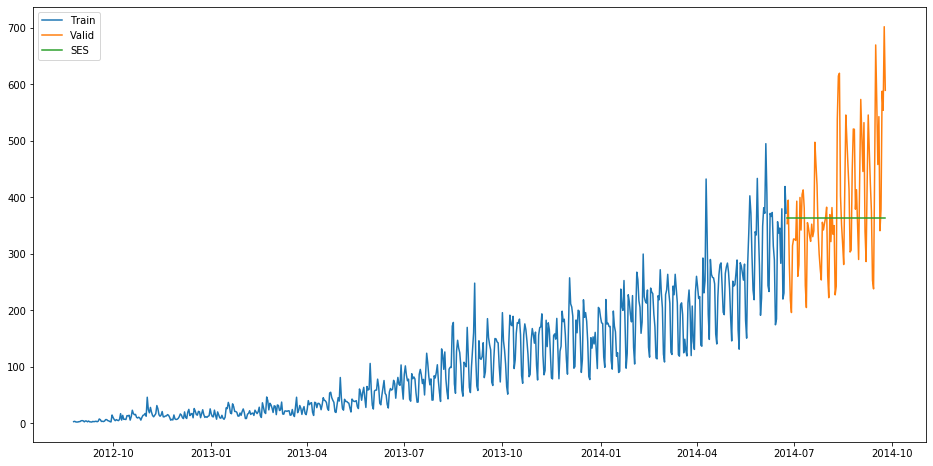

In [81]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [82]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print(rms)

113.43708111884514


# Holt’s Linear Trend Model

<Figure size 1152x576 with 0 Axes>

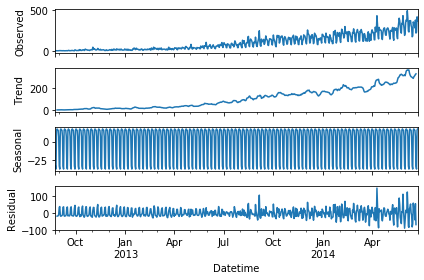

In [89]:
import statsmodels.api as sm 
plt.figure(figsize=(16,8))
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train_df.Count) 
plt.show()

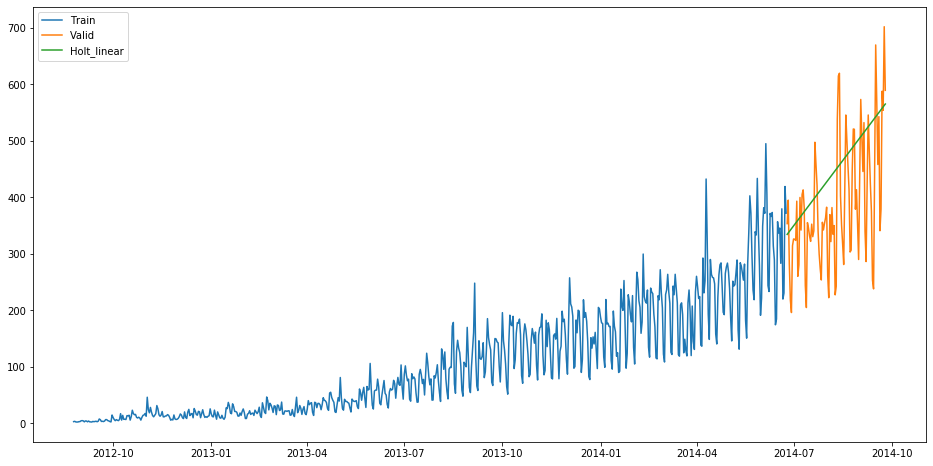

In [88]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()


In [90]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

112.94278345314041


# Holt’s Linear Trend Model on daily time series

In [92]:
submission=pd.read_csv("Sample_Submission_QChS6c3.csv")

In [93]:
submission.head()

,ID,Count


In [98]:
predict=fit1.forecast(len(test_df))
test_df['prediction']=predict

In [99]:
test_df.head()

,ID,year,month,day,Hour,prediction
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,334.650767
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,337.159011
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.667256
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,342.175500
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,344.683745


In [100]:
# Calculating the hourly ratio of count 
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 

In [101]:
# Grouping the hourly ratio 
temp=train_original.groupby(['Hour'])['ratio'].sum() 

In [102]:
# Groupby to csv format 
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv') 

In [103]:
temp2=pd.read_csv("GROUPby.csv") 
temp2=temp2.drop('Hour.1',1) 

In [106]:
temp2

,Hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802
5,5,0.018621
6,6,0.020023
7,7,0.023221
8,8,0.026741
9,9,0.034555


In [109]:
# Merge Test and test_original on day, month and year 
merge=pd.merge(test_df, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale prediction['Count']=prediction['prediction']*prediction['ratio']*24 prediction['ID']=prediction['ID_y']

In [110]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'],axis=1) 
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

In [111]:
prediction

,ID_x,day,prediction,ID_y,Hour,ratio
0,18299.5,26.0,334.650767,18288,0,0.044287
1,18299.5,26.0,334.650767,18289,1,0.035343
2,18299.5,26.0,334.650767,18290,2,0.029911
3,18299.5,26.0,334.650767,18291,3,0.024714
4,18299.5,26.0,334.650767,18292,4,0.020802
5,18299.5,26.0,334.650767,18293,5,0.018621
6,18299.5,26.0,334.650767,18294,6,0.020023
7,18299.5,26.0,334.650767,18295,7,0.023221
8,18299.5,26.0,334.650767,18296,8,0.026741
9,18299.5,26.0,334.650767,18297,9,0.034555


In [112]:
rms = sqrt(mean_squared_error(prediction.Count,y_hat_avg.Holt_linear))
print(rms)

AttributeError: 'DataFrame' object has no attribute 'Count'

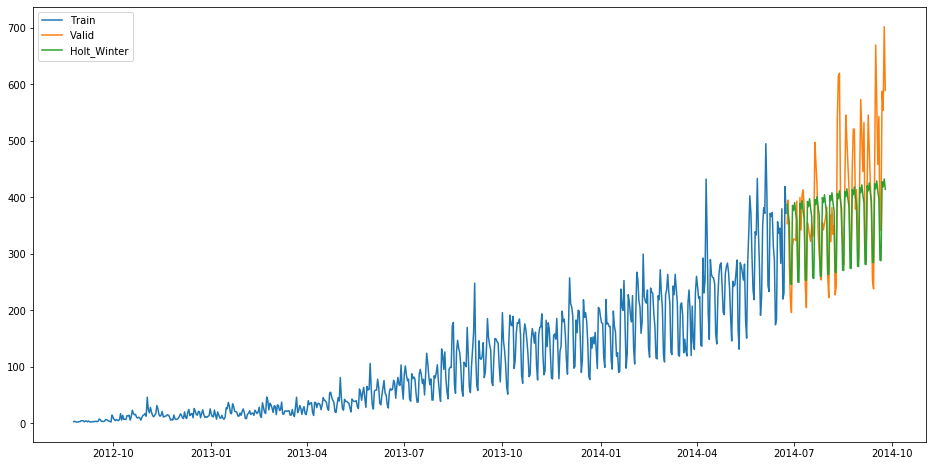

In [113]:
y_hat_avg = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [115]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter)) 
print(rms)

82.37571191747172


In [118]:
test_df['prediction']=predict
# Merge Test and test_original on day, month and year 
merge=pd.merge(test_df, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [119]:
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio
0,18299.5,26.0,334.650767,18288,0,0.044287
1,18299.5,26.0,334.650767,18289,1,0.035343
2,18299.5,26.0,334.650767,18290,2,0.029911
3,18299.5,26.0,334.650767,18291,3,0.024714
4,18299.5,26.0,334.650767,18292,4,0.020802


In [121]:
prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')